In [1]:
# necessery libraries
import pandas as pd
import sys
sys.path.insert(0,'../src/utils/')
import general_look_at_data as  GLAD

# Explore Dataset in General

In [2]:
# data source must be updated to featsel folder rather than raw
data = pd.read_csv('../data/featsel/Citywide_Survey_featsel.csv')

In [3]:
# get the shape of the data
data.shape

(3346, 156)

In [4]:
# set option setting to display all columns
pd.set_option('display.max_columns', None)

In [5]:
# Display the head of data
data.head()

,cms_zone,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,first_travel_date,last_travel_date,made_trips,smartphone_type,age,employment,worker,student,license,vehicle,congestion,drive_cbd_freq,planning_apps,job_type,jobs_count,industry,telework_freq,work_cms_zone,missing_work_location,work_mode,work_mode_own,work_park_location,work_park_pay,work_vehicle_pass_period,work_park_amount_day,work_park_amount_week,work_park_amount_month,work_park_amount_year,work_mode_auto,work_mode_bus,work_mode_rail,work_mode_ferry,work_mode_taxi,work_mode_bike,work_bike_park,work_mode_scooter,work_scooter_park,school_type,school_cms_zone,missing_school_location,kid_accompany,school_mode,school_mode_own,school_park_location,school_vehicle_pass_period,school_park_amount_day,school_park_amount_month,school_park_amount_week,school_park_amount_year,school_mode_auto,school_mode_bus,school_mode_rail,school_mode_ferry,school_access,school_egress,school_mode_taxi,school_mode_bike,school_bike_park,school_mode_scooter,school_scooter_park,bike_freq,bike_num_days,bike_stolen,bike_purpose_errands,bike_purpose_transit,bike_purpose_recreation,bike_purpose_commute,bike_purpose_appointment,bike_purpose_other,no_bike_nyc_bike_lanes,no_bike_nyc_paving,no_bike_nyc_storage,no_bike_nyc_long_trips,no_bike_nyc_showers,no_bike_nyc_modes,no_bike_nyc_unable,no_bike_nyc_other,bike_share_citi_bike,bike_share_jump,bike_share_lime,bike_share_none,bike_share_user,citi_bike_freq,jump_freq,lime_freq,no_bike_share_unfamiliar,no_bike_share_expensive,no_bike_share_neighborhood,no_bike_share_stations,no_bike_share_personal_bike,no_bike_share_docks,no_bike_share_uncomfortable,no_bike_share_other,tnc_use_uber,tnc_use_lyft,tnc_use_via,tnc_use_juno,tnc_use_none,tnc_user,tnc_freq,tnc_purpose,tnc_mode,tnc_mode_auto,tnc_mode_taxi,tnc_mode_bus,tnc_mode_rail,tnc_mode_ferry,tnc_mode_bike,tnc_mode_scooter,car_share_zipcar,car_share_car2go,car_share_enterprise,car_share_other,car_share_none,car_share_user,packages,packages_distance,harassment,harassment_trip,harassment_time,harassment_route,harassment_transit,harassment_mode,harassment_neighborhood,harassment_private_car,harassment_alone,harassment_attention,harassment_defense,harassment_other,harassment_none,gender,education,english_proficiency,ethnicity,race_american_indian,race_asian,race_black,race_native_hawaiian,race_white,race_other,disability_hearing,disability_seeing,disability_walking,disability_mobility,disability_dressing,disability_concentrating,disability_none
0,Inner Brooklyn,23.0,1.0,3.0,11.0,0.0,0.0,2.0,5.0,06/24/2019,06/30/2019,1.0,1,5,6,0,1,1,1,4,7,1,995,995,995,995,NaN,0,995,995,995,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,10,NaN,1,995,100,6,4,5,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,995,2,2,0,1,0,1,0,0,0,995,995,995,995,995,995,995,995,0,0,0,1,0,995,995,995,0,0,0,0,1,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995,995,995,0,0,0,0,1,0,4,2,4,995,995,995,995,995,995,995,995,995,995,995,995,1,5,1,997,0,0,0,1,0,0,0,0,0,0,0,0,1
1,Middle Queens,15.0,2.0,1.0,0.0,0.0,0.0,2.0,5.0,05/29/2019,06/04/2019,1.0,2,5,2,1,2,0,1,4,8,3,1,1,8,8,NaN,0,100,6,6,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,9,NaN,1,995,102,995,995,995,NaN,NaN,NaN,NaN,995,23,995,995,995,995,995,995,995,995,995,5,0,0,995,995,995,995,995,995,0,0,0,0,0,1,0,0,0,0,0,1,0,995,995,995,0,0,0,0,0,0,0,1,1,1,0,0,0,1,7,1,105,995,995,995,30,995,995,995,0,0,0,0,1,0,1,995,4,995,995,995,995,995,995,995,995,995,995,995,995,2,6,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1
2,Middle Queens,30.0,22.0,9.0,0.0,0.0,0.0,2.0,5.0,06/06/2019,06/12/2019,1.0,2,7,7,1,0,0,995,2,995,3,1,1,15,8,NaN,1,105,995,995,995,995,NaN,NaN,NaN,NaN,995,995,30,995,995,995,995,995,995,995,NaN,0,995,995,995,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,995,5,0,0,995,995,995,995,995,995,1,0,0,0,0,0,0,0,0,0,0,1,0,995,995,995,0,0,1,0,0,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995

In [6]:
# check features data types 
data.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

# Explore Categorical vs. Numerical Datasets

In [7]:
# get numeric and categorical features names 
numeric_features = data.select_dtypes(include=['float64', 'int64'])
categorical_features = data.select_dtypes(include='O')

## Statistical Information from Numerical Dataset

In [8]:
# Display 5 random samples of numeric dataset
numeric_features.sample(5)

,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,made_trips,smartphone_type,age,employment,worker,student,license,vehicle,congestion,drive_cbd_freq,planning_apps,job_type,jobs_count,industry,telework_freq,missing_work_location,work_mode,work_mode_own,work_park_location,work_park_pay,work_vehicle_pass_period,work_park_amount_day,work_park_amount_week,work_park_amount_month,work_park_amount_year,work_mode_auto,work_mode_bus,work_mode_rail,work_mode_ferry,work_mode_taxi,work_mode_bike,work_bike_park,work_mode_scooter,work_scooter_park,school_type,missing_school_location,kid_accompany,school_mode,school_mode_own,school_park_location,school_vehicle_pass_period,school_park_amount_day,school_park_amount_month,school_park_amount_week,school_park_amount_year,school_mode_auto,school_mode_bus,school_mode_rail,school_mode_ferry,school_access,school_egress,school_mode_taxi,school_mode_bike,school_bike_park,school_mode_scooter,school_scooter_park,bike_freq,bike_num_days,bike_stolen,bike_purpose_errands,bike_purpose_transit,bike_purpose_recreation,bike_purpose_commute,bike_purpose_appointment,bike_purpose_other,no_bike_nyc_bike_lanes,no_bike_nyc_paving,no_bike_nyc_storage,no_bike_nyc_long_trips,no_bike_nyc_showers,no_bike_nyc_modes,no_bike_nyc_unable,no_bike_nyc_other,bike_share_citi_bike,bike_share_jump,bike_share_lime,bike_share_none,bike_share_user,citi_bike_freq,jump_freq,lime_freq,no_bike_share_unfamiliar,no_bike_share_expensive,no_bike_share_neighborhood,no_bike_share_stations,no_bike_share_personal_bike,no_bike_share_docks,no_bike_share_uncomfortable,no_bike_share_other,tnc_use_uber,tnc_use_lyft,tnc_use_via,tnc_use_juno,tnc_use_none,tnc_user,tnc_freq,tnc_purpose,tnc_mode,tnc_mode_auto,tnc_mode_taxi,tnc_mode_bus,tnc_mode_rail,tnc_mode_ferry,tnc_mode_bike,tnc_mode_scooter,car_share_zipcar,car_share_car2go,car_share_enterprise,car_share_other,car_share_none,car_share_user,packages,packages_distance,harassment,harassment_trip,harassment_time,harassment_route,harassment_transit,harassment_mode,harassment_neighborhood,harassment_private_car,harassment_alone,harassment_attention,harassment_defense,harassment_other,harassment_none,gender,education,english_proficiency,ethnicity,race_american_indian,race_asian,race_black,race_native_hawaiian,race_white,race_other,disability_hearing,disability_seeing,disability_walking,disability_mobility,disability_dressing,disability_concentrating,disability_none
1646,45.0,18.0,0.0,2.0,0.0,0.0,2.0,3.0,1.0,1,8,6,0,0,1,1,1,6,2,995,995,995,995,0,995,995,995,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,0,995,995,995,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,995,4,995,0,0,0,1,0,0,0,995,995,995,995,995,995,995,995,0,0,0,1,0,995,995,995,0,0,1,0,0,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995,995,995,0,0,0,0,1,0,1,995,4,995,995,995,995,995,995,995,995,995,995,995,995,2,7,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0
1180,26.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,1,7,1,1,0,1,1,4,6,6,1,1,4,8,0,100,6,3,1,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,0,995,995,995,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,995,5,995,0,995,995,995,995,995,995,1,1,0,0,0,0,0,0,0,0,0,1,0,995,995,995,0,0,0,0,0,0,1,0,1,1,0,0,0,1,7,99,106,995,60,995,995,995,995,995,0,0,0,0,1,0,2,995,4,995,995,995,995,995,995,995,995,995,995,995,995,1,5,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3109,6.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,6,2,1,0,1,1,2,8,7,2,1,10,8,0,105,995,995,995,995,NaN,NaN,NaN,NaN,995,995,30,995,995,995,995,995,995,995,0,995,995,995,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,995,5,995,0,995,995,995,995,995,995,0,0,0,0,0,1,0,0,0,0,0,1,0,995,995,995,0,0,1,0,0,0,0,1,0,0,0,0,1,0,995,995,995,995,995,995,995,995,995,995,0,0,0,0,1,0,6,3,4,995,995,995,995,995,995,995,995,995,995,995,995,1,6,1,997,0,1,0,0,0,0,0,0,0,0,0,0,1
2870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,7,1,1,0,1,1,3,7,7,2,1,14,4,0,100,6,

In [9]:
# Display the columns number of numeric dataset
numeric_features.shape[1]

151

In [10]:
# Display Statistics of numeric data
numeric_features.describe()

,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,made_trips,smartphone_type,age,employment,worker,student,license,vehicle,congestion,drive_cbd_freq,planning_apps,job_type,jobs_count,industry,telework_freq,missing_work_location,work_mode,work_mode_own,work_park_location,work_park_pay,work_vehicle_pass_period,work_park_amount_day,work_park_amount_week,work_park_amount_month,work_park_amount_year,work_mode_auto,work_mode_bus,work_mode_rail,work_mode_ferry,work_mode_taxi,work_mode_bike,work_bike_park,work_mode_scooter,work_scooter_park,school_type,missing_school_location,kid_accompany,school_mode,school_mode_own,school_park_location,school_vehicle_pass_period,school_park_amount_day,school_park_amount_month,school_park_amount_week,school_park_amount_year,school_mode_auto,school_mode_bus,school_mode_rail,school_mode_ferry,school_access,school_egress,school_mode_taxi,school_mode_bike,school_bike_park,school_mode_scooter,school_scooter_park,bike_freq,bike_num_days,bike_stolen,bike_purpose_errands,bike_purpose_transit,bike_purpose_recreation,bike_purpose_commute,bike_purpose_appointment,bike_purpose_other,no_bike_nyc_bike_lanes,no_bike_nyc_paving,no_bike_nyc_storage,no_bike_nyc_long_trips,no_bike_nyc_showers,no_bike_nyc_modes,no_bike_nyc_unable,no_bike_nyc_other,bike_share_citi_bike,bike_share_jump,bike_share_lime,bike_share_none,bike_share_user,citi_bike_freq,jump_freq,lime_freq,no_bike_share_unfamiliar,no_bike_share_expensive,no_bike_share_neighborhood,no_bike_share_stations,no_bike_share_personal_bike,no_bike_share_docks,no_bike_share_uncomfortable,no_bike_share_other,tnc_use_uber,tnc_use_lyft,tnc_use_via,tnc_use_juno,tnc_use_none,tnc_user,tnc_freq,tnc_purpose,tnc_mode,tnc_mode_auto,tnc_mode_taxi,tnc_mode_bus,tnc_mode_rail,tnc_mode_ferry,tnc_mode_bike,tnc_mode_scooter,car_share_zipcar,car_share_car2go,car_share_enterprise,car_share_other,car_share_none,car_share_user,packages,packages_distance,harassment,harassment_trip,harassment_time,harassment_route,harassment_transit,harassment_mode,harassment_neighborhood,harassment_private_car,harassment_alone,harassment_attention,harassment_defense,harassment_other,harassment_none,gender,education,english_proficiency,ethnicity,race_american_indian,race_asian,race_black,race_native_hawaiian,race_white,race_other,disability_hearing,disability_seeing,disability_walking,disability_mobility,disability_dressing,disability_concentrating,disability_none
count,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,24.000000,12.000000,22.000000,4.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.0,3346.0,3346.000000,3346.000000,3346.0,3346.000000,3346.000000,3346.000000,3346.000000,6.000000,7.000000,4.000000,7.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.0,3346.0,3346.000000,3346.000000,3346.000000,3346.0,3346.0,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346

### Conclusions Based on the Statistics Presented
* Almost all numerical data is one hot including.
* Missing data values/labels such as -9998 and 995 have an impact on statistics.
* Because work park amount_ and school park amount_ are rare data, their distribution is skewed.

## Statistical Information from Categorical Dataset

In [11]:
# Display 5 samples of categorical dataset
categorical_features.sample(5)

,cms_zone,first_travel_date,last_travel_date,work_cms_zone,school_cms_zone
2360,Outer Queens,06/01/2019,06/07/2019,Middle Queens,NaN
3096,Outer Brooklyn,06/23/2019,06/23/2019,NaN,NaN
2009,Manhattan Core,06/22/2019,06/28/2019,Manhattan Core,NaN
1111,Outer Queens,06/14/2019,06/20/2019,NaN,NaN
168,Manhattan Core,06/12/2019,06/18/2019,NaN,NaN


In [12]:
# Display 5 samples of categorical dataset
categorical_features.shape[1]

5

In [13]:
# Display Statistics of categorical data
categorical_features.describe()

,cms_zone,first_travel_date,last_travel_date,work_cms_zone,school_cms_zone
count,3346,3346,3346,1687,122
unique,10,39,40,12,10
top,Northern Bronx,06/07/2019,06/13/2019,Manhattan Core,Manhattan Core
freq,416,268,279,815,35


### Conclusions based on the statistics presented
* The 'work_cms_zone' feature contain nearly 50% missing data.
* Because 'scool_cms_zone' feature are rare data, its distribution is skewed.

## Summary of Exploring the two Datasets
- There are 151 numeric features but some of them are a kind of labels for the data such as tnc_mode, pakages, etc. 
- There are 5 categorical feature 2 of them are of type time series. 
- The above mentioned wrong data types will be handled during the feature engineering process. 

# Explore Missing Data Information

In [14]:
# Display percentages about types of missing data in the features
feature_missing_stats = GLAD.get_feature_missing(data)
feature_missing_stats

,missing_count,missing_percentage,dont_know_percentage,no_response_percentage,technological_error_percentage,prefer_not_to_answer_percentage,not_required_percentage,feature_type
feature,,,,,,,,
school_park_amount_week,3342,0.998805,0.0,0.0,0.0,0.000000,0.000000,float64
work_park_amount_year,3342,0.998805,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_day,3340,0.998207,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_month,3339,0.997908,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_year,3339,0.997908,0.0,0.0,0.0,0.000000,0.000000,float64
...,...,...,...,...,...,...,...,...
school_bike_park,0,0.000000,0.0,0.0,0.0,0.000000,0.997908,int64
school_mode_bike,0,0.000000,0.0,0.0,0.0,0.000000,0.997908,int64
school_mode_taxi,0,0.000000,0.0,0.0,0.0,0.000000,0.998207,int64


## Direct Missing Data

In [15]:
direct_missing = GLAD.display_direct_missing(feature_missing_stats)
direct_missing

,missing_count,missing_percentage
feature,,
school_park_amount_week,3342,0.998805
work_park_amount_year,3342,0.998805
school_park_amount_day,3340,0.998207
school_park_amount_month,3339,0.997908
school_park_amount_year,3339,0.997908
work_park_amount_week,3334,0.996414
work_park_amount_month,3324,0.993425
work_park_amount_day,3322,0.992827
school_cms_zone,3224,0.963539


## Suggestion to Handle Missing Data of Direct Missing Columns
1. Based on the previous statistics, I recommend that the **following features be deleted that have a missing percentage of higher than 0.75**:
['work_park_amount_day', 'work_park_amount_week', 'work_park_amount_month', 'work_park_amount_year', 'school_cms_zone', 'school_park_amount_day', 'school_park_amount_month', 'school_park_amount_week', 'school_park_amount_year'].

2. Recommend that the missing data for the **'work_cms_zone' feature be filled by the KNN algorithm**. *[for this iteration use Mode value insted]*

## Indirect Missing Data

In [16]:
indirect_missing = GLAD.display_indirect_missing(feature_missing_stats)
indirect_missing

,dont_know_percentage,no_response_percentage,technological_error_percentage,prefer_not_to_answer_percentage,not_required_percentage,feature_type
feature,,,,,,
school_park_amount_week,0.0,0.0,0.0,0.000000,0.000000,float64
work_park_amount_year,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_day,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_month,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_year,0.0,0.0,0.0,0.000000,0.000000,float64
...,...,...,...,...,...,...
school_bike_park,0.0,0.0,0.0,0.000000,0.997908,int64
school_mode_bike,0.0,0.0,0.0,0.000000,0.997908,int64
school_mode_taxi,0.0,0.0,0.0,0.000000,0.998207,int64


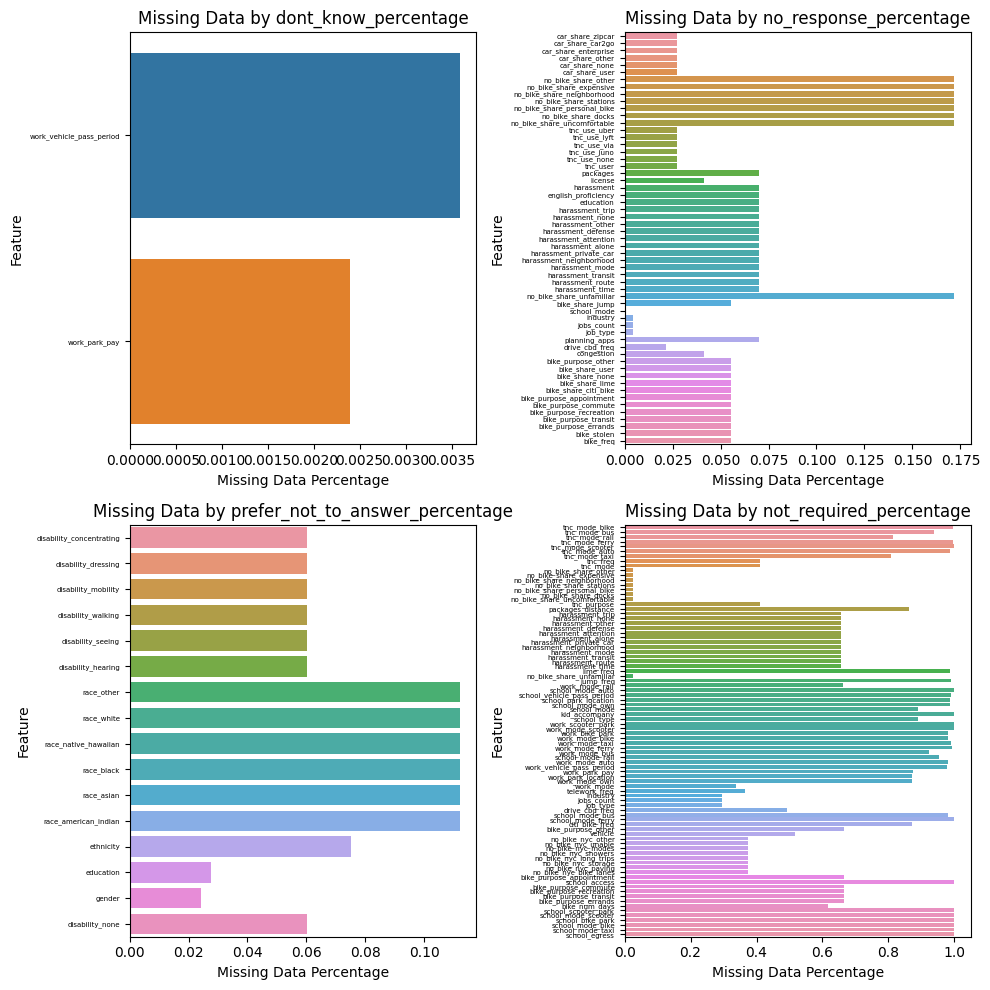

In [17]:
GLAD.plot_indirect_missing(indirect_missing)

## Suggestion to Handle Missing Data of Indirect Missing Columns
- **Remove columns that have more than 75% missing data.**
- **Fill in** the missing values **for the one hot encoding column** in natural structure by zero value.
- Otherwise, **fill in** the missing data **with the column's mode or mean value**.